<a href="https://colab.research.google.com/github/dlguswls/MiniProject/blob/main/%EB%84%A4%EC%9D%B4%EB%B2%84%20%EC%9B%B9%ED%88%B0%20%EC%8D%B8%EB%84%A4%EC%9D%BC%EB%A1%9C%20%EC%A0%80%EC%97%B0%EB%A0%B9%EC%B8%B5%20%EB%8C%80%EC%83%81%20%EC%BD%98%ED%85%90%EC%B8%A0%20%ED%95%84%ED%84%B0%EB%A7%81/%EB%84%A4%EC%9D%B4%EB%B2%84_%EC%9B%B9%ED%88%B0_%EC%8D%B8%EB%84%A4%EC%9D%BC%EB%A1%9C_%EC%A0%80%EC%97%B0%EB%A0%B9%EC%B8%B5_%EB%8C%80%EC%83%81_%EC%BD%98%ED%85%90%EC%B8%A0_%ED%95%84%ED%84%B0%EB%A7%81_(18102002%EC%9D%B4%ED%98%84%EC%A7%84).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 네이버 웹툰 크롤링

크롤링 코드는 JUPYTER NOTEBOOK 환경에서 작성되어 로컬 저장소에 결과를 저장하는 코드입니다!

In [ ]:
!pip install requests
!pip install pandas
!pip install BeautifulSoup4
!pip install xlrd
!pip install openpyxl
!pip install selenium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 983 kB 5.2 MB/s 
     |████████████████████████████████| 138 kB 43.4 MB/s 
     |████████████████████████████████| 359 kB 43.2 MB/s 
     |████████████████████████████████| 55 kB 2.5 MB/s 
     |████████████████████████████████| 4.0 MB 31.6 MB/s 
     |████████████████████████████████| 58 kB 5.1 MB/s 
  Attempting uninstall: urllib3
    Found existing installation

In [ ]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from time import sleep
import pandas as pd
import pandas as pd

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


현재 연재중인 요일별 웹툰 크롤링

In [ ]:
URL = 'https://comic.naver.com/webtoon/weekday.nhn'
html = requests.get(URL).text # html 문서 전체를 긁어서 출력해줌, .text는 태그 제외하고 text만 출력되게 함
soup = BeautifulSoup(html, 'html.parser')

In [ ]:
title = soup.find_all('a', {'class' : 'title'}) # a태그에서 class='title'인 html소스를 찾아 할당
id_list = [] ; title_list = [] ; genre_list = [] ; thumbnail_list = []
num = 0

In [ ]:
driver = webdriver.Chrome('C:/Users/82109/project/chromedriver.exe') # 크롬 사용하니까
driver.get(URL)

In [ ]:
for i in range(len(title)):
        
    page = driver.find_elements_by_css_selector('a.title')
    page[i].click() #월요일 첫 번째 웹툰부터 순서대로 클릭
    
    sleep(0.5)

    id_list.append(i)
    title_list.append(driver.find_element_by_css_selector('span.title').text)
    genre_list.append(driver.find_element_by_css_selector('span.genre').text)
    thumbnail_list.append(driver.find_element_by_css_selector('.thumb>a>img').get_attribute('src'))

    sleep(0.5)

    driver.back()

In [ ]:
data = pd.DataFrame([id_list, title_list, genre_list, thumbnail_list]) # 529개의 데이터

In [ ]:
data.T.to_csv("data.csv", encoding = 'cp949')

In [ ]:
title = soup.select('ul>li>dl>dt>a') # a태그에서 class='title'인 html소스를 찾아 할당
id_list = [] ; title_list = [] ; genre_list = [] ; thumbnail_list = []
num = 0

In [ ]:
driver = webdriver.Chrome('C:/Users/82109/project/chromedriver.exe') # 크롬 사용하니까
driver.get(URL)

In [ ]:
for i in range(len(title)):
        
    page = driver.find_elements_by_css_selector('ul>li>dl>dt>a')
    page[i].click() #월요일 첫 번째 웹툰부터 순서대로 클릭
    
    sleep(0.5)

    id_list.append(i)
    title_list.append(driver.find_element_by_css_selector('span.title').text)
    genre_list.append(driver.find_element_by_css_selector('span.genre').text)
    thumbnail_list.append(driver.find_element_by_css_selector('.thumb>a>img').get_attribute('src'))

    sleep(0.5)

    driver.back()

In [ ]:
data = pd.DataFrame([id_list, title_list, genre_list, thumbnail_list]) # 1986개의 데이터

In [ ]:
data.T.to_csv("finish_data2.csv", encoding = 'cp949')

두 데이터프레임 합치기

In [ ]:
df1 = pd.read_csv('data.csv', encoding = 'cp949', index_col = 0)
df2 = pd.read_csv('finish_data2.csv', encoding = 'cp949', idnex_col = 0)

In [ ]:
df1.drop('0', axis = 1, inplace = True)
df2.drop('0', axis = 1, inplace = True)

In [ ]:
df1.columns = ['title', 'genre', 'thumbnail']
df2.columns = ['title', 'genre', 'thumbnail']

In [ ]:
df = pd.concat([df1, df2], axis = 0)

In [ ]:
df.to_csv('df.csv', encoding = 'utf-8')

# df 불러오기



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Project/blockchain_deeplearning/df.csv', encoding = 'utf-8', index_col = 0)
data = data.reset_index()

In [ ]:
data

,index,title,genre,thumbnail
0,0,참교육,"스토리, 액션",https://shared-comic.pstatic.net/thumb/webtoon...
1,1,쇼미더럭키짱!,"에피소드, 액션",https://shared-comic.pstatic.net/thumb/webtoon...
2,2,뷰티풀 군바리,"스토리, 드라마",https://shared-comic.pstatic.net/thumb/webtoon...
3,3,신의 탑,"스토리, 판타지",https://shared-comic.pstatic.net/thumb/webtoon...
4,4,퀘스트지상주의,"스토리, 드라마",https://shared-comic.pstatic.net/thumb/webtoon...
...,...,...,...,...
2510,1981,AA,"스토리, 로맨스",https://shared-comic.pstatic.net/thumb/webtoon...
2511,1982,사랑in,"옴니버스, 로맨스",https://shared-comic.pstatic.net/thumb/webtoon...
2512,1983,까뱅,"에피소드, 개그",https://shared-comic.pstatic.net/thumb/webtoon...
2513,1984,와탕카,"에피소드, 개그",https://shared-comic.pstatic.net/thumb/webtoon...


In [ ]:
df = data

# 이미지 보여주기

In [ ]:
import requests
from io import BytesIO
from PIL import Image
import time

# 다운받을 이미지 url
url = data['thumbnail'][0]

# time check
start = time.time()

# request.get 요청
res = requests.get(url)

# 이미지 다운로드 시간 체크
print(time.time() - start)

#Img open
request_get_img = Image.open(BytesIO(res.content))

1.0720210075378418


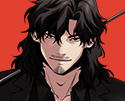

In [ ]:
request_get_img

In [ ]:
imag1_size = request_get_img.size

print(imag1_size)

(125, 101)


# 전처리

## 장르 정리

In [ ]:
data['genre'].value_counts()

스토리, 로맨스       502
스토리, 드라마       485
스토리, 판타지       422
스토리, 스릴러       273
스토리, 액션        178
스토리, 개그         98
에피소드, 일상        83
에피소드, 개그        71
에피소드, 드라마       67
옴니버스, 스릴러       40
옴니버스, 드라마       35
스토리, 무협/사극      31
스토리, 감성         30
에피소드, 로맨스       25
스토리, 스포츠        25
옴니버스, 개그        25
옴니버스, 판타지       21
에피소드, 감성        20
옴니버스, 일상        19
에피소드, 액션        17
에피소드, 스릴러       15
스토리, 일상         11
에피소드, 판타지        8
옴니버스, 로맨스        6
에피소드, 스포츠        2
에피소드, 무협/사극      2
옴니버스, 감성         2
옴니버스, 액션         1
옴니버스, 스포츠        1
Name: genre, dtype: int64

In [ ]:
data['genre'] = data['genre'].apply(lambda x : x.split(',')[1].strip())

In [ ]:
data['genre'].value_counts()

드라마      587
로맨스      533
판타지      451
스릴러      328
액션       196
개그       194
일상       113
감성        52
무협/사극     33
스포츠       28
Name: genre, dtype: int64

## 데이터 폴더 생성

### 데이터 다운받기

In [ ]:
# 폴더 생성 함수

import os
 
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)

In [ ]:
genre_k = list(data['genre'].value_counts().index)

In [ ]:
genre_k

['드라마', '로맨스', '판타지', '스릴러', '액션', '개그', '일상', '감성', '무협/사극', '스포츠']

In [ ]:
genre = ["Drama", "Romance", "Fantasy", "Thriller", "Action", "Joke", "Daily", "Sentiment", "Historical", "Sports"]

In [ ]:
createFolder('/content/drive/MyDrive/Project/blockchain_deeplearning/data')
for i in [genre] : 
  createFolder('/content/drive/MyDrive/Project/blockchain_deeplearning/data/{}'.format(i))

In [ ]:
from pandas.core.groupby.generic import DataFrameGroupBy
import requests
from io import BytesIO
from PIL import Image
from tqdm import tqdm

def img_save(data) : 
  for i in tqdm(range(len(data))) : 
    res = requests.get(data['thumbnail'][i])
    img = Image.open(BytesIO(res.content))
    for k in range(len(genre_k)) : 
      if data['genre'][i] == genre_k[k] : 
        img.save('/content/drive/MyDrive/Project/blockchain_deeplearning/data/{}/{}.png'.format(genre[k], str(i)))
        break

In [ ]:
img_save(data)

100%|██████████| 2515/2515 [28:00<00:00,  1.50it/s]


### train, validation, test 데이터 나누기

In [ ]:
createFolder('/content/drive/MyDrive/Project/blockchain_deeplearning/dataset/train')
createFolder('/content/drive/MyDrive/Project/blockchain_deeplearning/dataset/valid')
createFolder('/content/drive/MyDrive/Project/blockchain_deeplearning/dataset/test')

In [ ]:
createFolder('/content/drive/MyDrive/Project/blockchain_deeplearning/dataset/train/0')
createFolder('/content/drive/MyDrive/Project/blockchain_deeplearning/dataset/train/1')
createFolder('/content/drive/MyDrive/Project/blockchain_deeplearning/dataset/valid/0')
createFolder('/content/drive/MyDrive/Project/blockchain_deeplearning/dataset/valid/1')
createFolder('/content/drive/MyDrive/Project/blockchain_deeplearning/dataset/test/0')
createFolder('/content/drive/MyDrive/Project/blockchain_deeplearning/dataset/test/1')

* 자극적인 : 0, Thriller, Action, Historical
* 자극적이지않은 : 1, Drama, Romance, Fantasy, Joker, Daily, Sentiment, Sports

In [ ]:
genre = ["Drama", "Romance", "Fantasy", "Thriller", "Action", "Joke", "Daily", "Sentiment", "Historical", "Sports"]

In [ ]:
import glob
import shutil
from tqdm import tqdm

for k in ['Thriller', 'Action', 'Historical'] : 
  png_lists = glob.glob('/content/drive/MyDrive/Project/blockchain_deeplearning/data/{}/*.png'.format(k))
  counts = len(png_lists)
  train_len = len(counts * 0.8)
  valid_len = len(counts * 0.1)
  test_len = counts - train_len - valid_len

  for i in range(train_len) : 
    filename = png_lists[i].split('/')[-1]
    src = '/content/drive/MyDrive/Project/blockchain_deeplearning/data/{}/'.format(k)
    dir = '/content/drive/MyDrive/Project/blockchain_deeplearning/dataset/train/0/'
    shutil.move(src+filename, dir+filename)

  png_lists = glob.glob('/content/drive/MyDrive/Project/blockchain_deeplearning/data/{}/*.png'.format(k))
  for i in range(valid_len) : 
    filename = png_lists[i].split('/')[-1]
    src = '/content/drive/MyDrive/Project/blockchain_deeplearning/data/{}/'.format(k)
    dir = '/content/drive/MyDrive/Project/blockchain_deeplearning/dataset/valid/0/'
    shutil.move(src+filename, dir+filename)

  png_lists = glob.glob('/content/drive/MyDrive/Project/blockchain_deeplearning/data/{}/*.png'.format(k))
  for i in range(test_len) : 
      filename = png_lists[i].split('/')[-1]
      src = '/content/drive/MyDrive/Project/blockchain_deeplearning/data/{}/'.format(k)
      dir = '/content/drive/MyDrive/Project/blockchain_deeplearning/dataset/test/0/'
      shutil.move(src+filename, dir+filename)


train_count = 0
valid_count = 0
test_count = 0

for k in ["Drama", "Romance", "Fantasy", "Joke", "Daily", "Sentiment", "Sports"] : 
  png_lists = glob.glob('/content/drive/MyDrive/Project/blockchain_deeplearning/data/{}/*.png'.format(k))
  counts = len(png_lists)
  train_len = len(counts * 0.8)
  valid_len = len(counts * 0.1)
  test_len = counts - train_len - valid_len

  for i in range(train_len) : 
    if train_count>=470 : 
      break
    filename = png_lists[i].split('/')[-1]
    src = '/content/drive/MyDrive/Project/blockchain_deeplearning/data/{}/'.format(k)
    dir = '/content/drive/MyDrive/Project/blockchain_deeplearning/dataset/train/1/'
    shutil.move(src+filename, dir+filename)
    train_count +=1

  png_lists = glob.glob('/content/drive/MyDrive/Project/blockchain_deeplearning/data/{}/*.png'.format(k))
  for i in range(valid_len) :
    if valid_count>=60 : 
      break 
    filename = png_lists[i].split('/')[-1]
    src = '/content/drive/MyDrive/Project/blockchain_deeplearning/data/{}/'.format(k)
    dir = '/content/drive/MyDrive/Project/blockchain_deeplearning/dataset/valid/1/'
    shutil.move(src+filename, dir+filename)
    valid_count+=1
    
  png_lists = glob.glob('/content/drive/MyDrive/Project/blockchain_deeplearning/data/{}/*.png'.format(k))
  for i in range(test_len) : 
    if test_count>=60 : 
      break
    filename = png_lists[i].split('/')[-1]
    src = '/content/drive/MyDrive/Project/blockchain_deeplearning/data/{}/'.format(k)
    dir = '/content/drive/MyDrive/Project/blockchain_deeplearning/dataset/test/1/'
    shutil.move(src+filename, dir+filename)
    test_count+=1

## input data 조정

In [ ]:
genre = ['0', '1']

In [ ]:
dst_path = '/content/drive/MyDrive/Project/blockchain_deeplearning/dataset'

In [ ]:
import os
for i in genre : 
  train_dir = os.path.join(dst_path, 'train/{}'.format(i))
  print('total training {} images:'.format(i), len(os.listdir(train_dir)))

for i in genre : 
  validation_dir = os.path.join(dst_path, 'valid/{}'.format(i))
  print('total validation {} images:'.format(i), len(os.listdir(validation_dir)))

for i in genre : 
  test_dir = os.path.join(dst_path, 'test/{}'.format(i))
  print('total test {} images:'.format(i), len(os.listdir(test_dir)))


total training 0 images: 444
total training 1 images: 469
total validation 0 images: 56
total validation 1 images: 59
total test 0 images: 57
total test 1 images: 59


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = os.path.join(dst_path, 'train')
validation_dir = os.path.join(dst_path, 'valid')
test_dir = os.path.join(dst_path, 'test')

# 0~1 사이 값으로 만든다
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')  
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),   # 이 타겟 사이즈에 맞춰서 resize된다
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150,150),
                                                        batch_size=20,
                                                        class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150,150),
                                                  batch_size=20,
                                                  class_mode='binary')

Found 913 images belonging to 2 classes.
Found 115 images belonging to 2 classes.
Found 116 images belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


# CNN

In [ ]:
from tensorflow.keras import layers 
from tensorflow.keras import models
from keras import regularizers

model = models.Sequential() 
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))    # 컬러 이미지라서 input 3차원
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Flatten()) 
model.add(layers.Dense(128,kernel_regularizer=regularizers.l2(0.005), activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
# 요즘은 Fully Connected Layer 안쓰고
# 이 모델 구조 자체도 자동 제작되게 함

In [ ]:
model.summary()
# 3211776 = 6272*512+512

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch=45, # 한 에포크 정의 위해 몇 번의 iteration이 필요한지- 하나의 배치에서 20개씩 되어있으니까 2000개 만들려면 100번 수행해야 함  
                    epochs=50,
                    validation_data=validation_generator,
                    validation_steps=5) 

Epoch 1/50
45/45 [==============================] - 261s 6s/step - loss: 1.6869 - acc: 0.5622 - val_loss: 1.4963 - val_acc: 0.6600
Epoch 2/50
45/45 [==============================] - 16s 345ms/step - loss: 1.3732 - acc: 0.6013 - val_loss: 1.2267 - val_acc: 0.6700
Epoch 3/50
45/45 [==============================] - 16s 343ms/step - loss: 1.1569 - acc: 0.6506 - val_loss: 1.0699 - val_acc: 0.6400
Epoch 4/50
45/45 [==============================] - 16s 346ms/step - loss: 1.0227 - acc: 0.6249 - val_loss: 1.0531 - val_acc: 0.5800
Epoch 5/50
45/45 [==============================] - 16s 346ms/step - loss: 0.9285 - acc: 0.6394 - val_loss: 0.8828 - val_acc: 0.6400
Epoch 6/50
45/45 [==============================] - 16s 357ms/step - loss: 0.8605 - acc: 0.6428 - val_loss: 0.8094 - val_acc: 0.6700
Epoch 7/50
45/45 [==============================] - 16s 345ms/step - loss: 0.8181 - acc: 0.6506 - val_loss: 0.7839 - val_acc: 0.6700
Epoch 8/50
45/45 [==============================] - 16s 346ms/step - lo

In [ ]:
model.save('/content/drive/MyDrive/Project/blockchain_deeplearning/1.h5')

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Project/blockchain_deeplearning/1.h5')
model.evaluate(test_generator)

6/6 [==============================] - 53s 11s/step - loss: 0.5839 - acc: 0.7155


[0.5838770866394043, 0.7155172228813171]

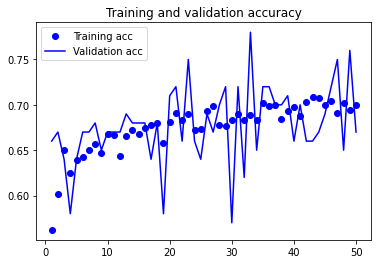

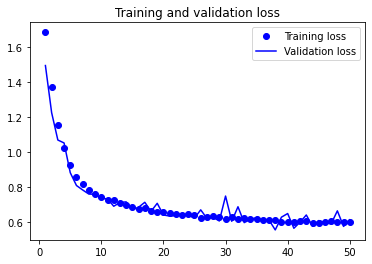

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc'] 
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.legend()

plt.show()



# VGGNet

In [ ]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,   # 마지막 Fully connected layer포함하는 것. True 이면 마지막 부분 뺌
                  input_shape=(150, 150, 3))

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
from keras import models
from keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from keras import regularizers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

conv_base.trainable = False

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=45,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=5)

model.save('/content/drive/MyDrive/Project/blockchain_deeplearning/2.h5')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
45/45 [==============================] - 115s 3s/step - loss: 0.8553 - acc: 0.5577 - val_loss: 0.5535 - val_acc: 0.7700
Epoch 2/50
45/45 [==============================] - 112s 3s/step - loss: 0.6383 - acc: 0.6529 - val_loss: 0.7838 - val_acc: 0.5900
Epoch 3/50
45/45 [==============================] - 113s 3s/step - loss: 0.5964 - acc: 0.6697 - val_loss: 0.5739 - val_acc: 0.6900
Epoch 4/50
45/45 [==============================] - 112s 2s/step - loss: 0.6137 - acc: 0.6719 - val_loss: 0.6305 - val_acc: 0.6700
Epoch 5/50
45/45 [==============================] - 112s 2s/step - loss: 0.5477 - acc: 0.7144 - val_loss: 0.7341 - val_acc: 0.6200
Epoch 6/50
45/45 [==============================] - 113s 3s/step - loss: 0.5307 - acc: 0.7346 - val_loss: 0.5465 - val_acc: 0.7200
Epoch 7/50
45/45 [==============================] - 113s 3s/step - loss: 0.5206 - acc: 0.7391 - val_loss: 0.5421 - val_acc: 0.7000
Epoch 8/50
45/45 [==============================] - 113s 3s/step - loss: 0.5219 - a

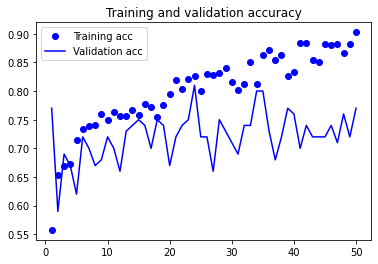

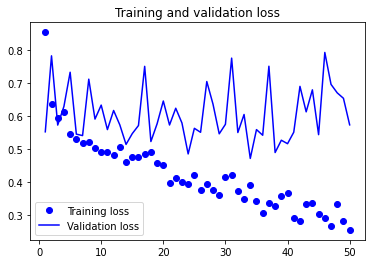

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc'] 
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.legend()

plt.show()



In [ ]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Project/blockchain_deeplearning/2.h5')
model.evaluate(test_generator)

6/6 [==============================] - 14s 2s/step - loss: 0.9189 - acc: 0.6638


[0.9189180135726929, 0.6637930870056152]

VGGNet의 사전 학습된 훈련 모델에서 마지막 convolution block까지 가중치 업데이트 가능하도록 하는 또다른 튜닝 방법

In [ ]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,   # 마지막 Fully connected layer포함하는 것. True 이면 마지막 부분 뺌
                  input_shape=(150, 150, 3))

In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5), # very low learning rate -> 미세조정
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=45,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=5)
model.save('/content/drive/MyDrive/Project/blockchain_deeplearning/3.h5')

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


45/45 [==============================] - 90s 2s/step - loss: 0.6814 - acc: 0.5722 - val_loss: 0.6578 - val_acc: 0.6300
Epoch 2/50
45/45 [==============================] - 89s 2s/step - loss: 0.6348 - acc: 0.6282 - val_loss: 0.5514 - val_acc: 0.7600
Epoch 3/50
45/45 [==============================] - 89s 2s/step - loss: 0.6116 - acc: 0.6797 - val_loss: 0.5621 - val_acc: 0.7200
Epoch 4/50
45/45 [==============================] - 89s 2s/step - loss: 0.5884 - acc: 0.6932 - val_loss: 0.6005 - val_acc: 0.6500
Epoch 5/50
45/45 [==============================] - 89s 2s/step - loss: 0.5572 - acc: 0.7066 - val_loss: 0.6269 - val_acc: 0.6600
Epoch 6/50
45/45 [==============================] - 90s 2s/step - loss: 0.5429 - acc: 0.7402 - val_loss: 0.5419 - val_acc: 0.7200
Epoch 7/50
45/45 [==============================] - 90s 2s/step - loss: 0.5276 - acc: 0.7447 - val_loss: 0.5962 - val_acc: 0.6900
Epoch 8/50
45/45 [==============================] - 91s 2s/step - loss: 0.5122 - acc: 0.7581 - val_lo

In [ ]:
model.evaluate(test_generator)

6/6 [==============================] - 9s 1s/step - loss: 1.1300 - acc: 0.6897


[1.130042314529419, 0.6896551847457886]

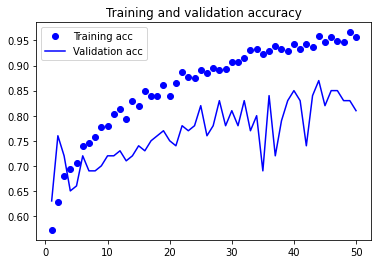

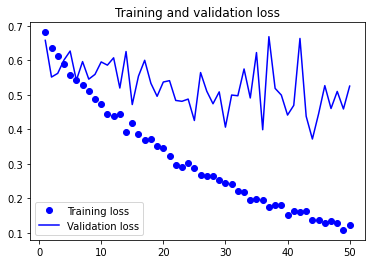

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc'] 
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.legend()

plt.show()

# ResNet

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer, Flatten

Res_model = ResNet50(include_top=True, weights=None, input_shape=(150, 150, 3), pooling=max, classes=2)


## ResNet50 모델에 Dense layer추가
Res_new_model = models.Sequential()
Res_new_model.add(Res_model)
Res_new_model.add(Dense(512, activation='relu', input_shape=(128,128,3)))
Res_new_model.add(Dropout(0.3))
Res_new_model.add(Dense(512, activation='relu'))
Res_new_model.add(Dropout(0.3))
Res_new_model.add(Dense(1, activation='sigmoid'))
Res_new_model.compile(loss='binary_crossentropy',
                        optimizer=keras.optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
Res_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 75, 75, 64)   256         ['conv1_conv[0][0]']      

In [ ]:
Res_new_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2)                 23591810  
                                                                 
 dense_11 (Dense)            (None, 512)               1536      
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_12 (Dense)            (None, 512)               262656    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 1)                 513       
                                                                 
Total params: 23,856,515
Trainable params: 23,803,395


In [ ]:
ResNet50_history = Res_new_model.fit_generator(train_generator,
                              steps_per_epoch=45,
                              epochs=50,
                              validation_data=validation_generator,
                              validation_steps=5)
model.save('/content/drive/MyDrive/Project/blockchain_deeplearning/4.h5')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/50
45/45 [==============================] - 126s 3s/step - loss: 0.6930 - accuracy: 0.5039 - val_loss: 0.6931 - val_accuracy: 0.5100
Epoch 2/50
45/45 [==============================] - 117s 3s/step - loss: 0.6915 - accuracy: 0.5151 - val_loss: 0.6931 - val_accuracy: 0.5100
Epoch 3/50
45/45 [==============================] - 117s 3s/step - loss: 0.6885 - accuracy: 0.5274 - val_loss: 0.6935 - val_accuracy: 0.4900
Epoch 4/50
45/45 [==============================] - 117s 3s/step - loss: 0.6810 - accuracy: 0.6002 - val_loss: 0.6951 - val_accuracy: 0.4800
Epoch 5/50
45/45 [==============================] - 117s 3s/step - loss: 0.6732 - accuracy: 0.6316 - val_loss: 0.6968 - val_accuracy: 0.4900
Epoch 6/50
45/45 [==============================] - 118s 3s/step - loss: 0.6625 - accuracy: 0.6652 - val_loss: 0.6940 - val_accuracy: 0.5200
Epoch 7/50
45/45 [==============================] - 118s 3s/step - loss: 0.6563 - accuracy: 0.6674 - val_loss: 0.7017 - val_accuracy: 0.4900
Epoch 8/50
45

In [ ]:
Res_new_model.evaluate(test_generator)

6/6 [==============================] - 3s 505ms/step - loss: 0.6743 - accuracy: 0.6638


[0.6742859482765198, 0.6637930870056152]

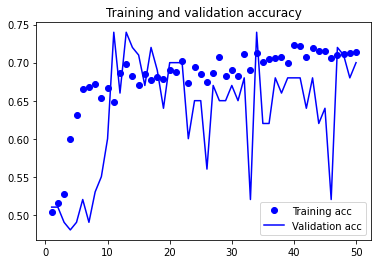

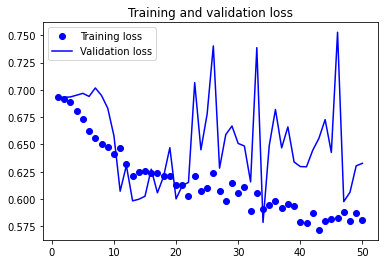

In [ ]:
import matplotlib.pyplot as plt

acc = ResNet50_history.history['accuracy'] 
val_acc = ResNet50_history.history['val_accuracy'] 
loss = ResNet50_history.history['loss'] 
val_loss = ResNet50_history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.legend()

plt.show()

# EfficientNet

In [ ]:
from tensorflow.keras.applications import EfficientNetB0

EfficientNetB0_base_model = EfficientNetB0(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=2,
    classifier_activation='sigmoid')

EfficientNetB0_model = models.Sequential()
EfficientNetB0_model.add(EfficientNetB0_base_model)

EfficientNetB0_model.add(layers.Flatten())
EfficientNetB0_model.add(layers.Dense(256, activation='relu'))
EfficientNetB0_model.add(layers.Dense(1, activation='sigmoid'))


EfficientNetB0_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=1e-5),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
EfficientNetB0_base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 224, 224, 3)  0           ['input_6[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 224, 224, 3)  7          ['rescaling_1[0][0]']            
 )                                                                                                
                                                                                     

In [ ]:
EfficientNetB0_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 2)                4052133   
                                                                 
 flatten_4 (Flatten)         (None, 2)                 0         
                                                                 
 dense_14 (Dense)            (None, 256)               768       
                                                                 
 dense_15 (Dense)            (None, 1)                 257       
                                                                 
Total params: 4,053,158
Trainable params: 4,011,135
Non-trainable params: 42,023
_________________________________________________________________


In [ ]:
EfficientB0_history = EfficientNetB0_model.fit_generator(train_generator,
                              steps_per_epoch=45,
                              epochs=50,
                              validation_data=validation_generator,
                              validation_steps=5)
model.save('/content/drive/MyDrive/Project/blockchain_deeplearning/5.h5')

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


45/45 [==============================] - 35s 640ms/step - loss: 0.6925 - acc: 0.5129 - val_loss: 0.6933 - val_acc: 0.4800
Epoch 2/50
45/45 [==============================] - 27s 603ms/step - loss: 0.6934 - acc: 0.4961 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 3/50
45/45 [==============================] - 28s 610ms/step - loss: 0.6931 - acc: 0.5095 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 4/50
45/45 [==============================] - 27s 608ms/step - loss: 0.6927 - acc: 0.5409 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 5/50
45/45 [==============================] - 28s 616ms/step - loss: 0.6930 - acc: 0.5050 - val_loss: 0.6931 - val_acc: 0.5100
Epoch 6/50
45/45 [==============================] - 27s 607ms/step - loss: 0.6920 - acc: 0.5286 - val_loss: 0.6934 - val_acc: 0.4700
Epoch 7/50
45/45 [==============================] - 29s 639ms/step - loss: 0.6926 - acc: 0.5062 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 8/50
45/45 [==============================] - 30s 655ms/step - loss: 0.691

In [ ]:
EfficientNetB0_model.evaluate(test_generator)

6/6 [==============================] - 1s 130ms/step - loss: 0.6498 - acc: 0.6897


[0.6498020887374878, 0.6896551847457886]

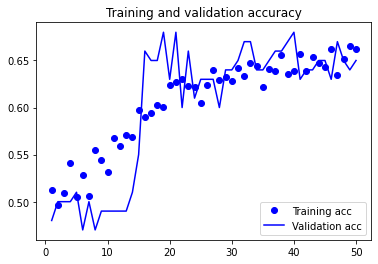

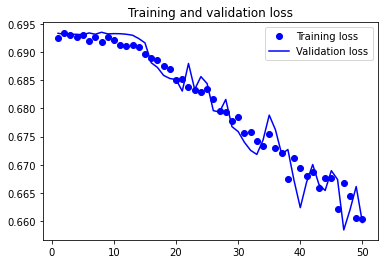

In [ ]:
import matplotlib.pyplot as plt

acc = EfficientB0_history.history['acc'] 
val_acc = EfficientB0_history.history['val_acc'] 
loss = EfficientB0_history.history['loss'] 
val_loss = EfficientB0_history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.legend()

plt.show()